In [25]:
import re
import string
import pandas as pd

In [26]:
data = pd.read_csv("../input/Tweets.csv")
data = data[['text']]

## Eliminating Punctuation

In [27]:
s = "You're the most handsome man, in the world."

In [28]:
s.translate(str.maketrans('', '', string.punctuation))

'Youre the most handsome man in the world'

In [29]:
%time
ulala = []
for index, row in data.iterrows():
    ulala.append(row['text'].translate(str.maketrans('', '', string.punctuation)))
    
data['text2']=ulala

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


## Lowercase and Uppercase

In [30]:
text = 'Hardwork IS KeY to SuccesS'
print(text.lower())

hardwork is key to success


In [40]:
%time
data['text3'] = data['text2'].str.lower()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


In [41]:
data.head()

,text,text2,text3
0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said,virginamerica what dhepburn said
1,@VirginAmerica plus you've added commercials t...,VirginAmerica plus youve added commercials to ...,virginamerica plus youve added commercials to ...
2,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didnt today Must mean I need t...,virginamerica i didnt today must mean i need t...
3,@VirginAmerica it's really aggressive to blast...,VirginAmerica its really aggressive to blast o...,virginamerica its really aggressive to blast o...
4,@VirginAmerica and it's a really big bad thing...,VirginAmerica and its a really big bad thing a...,virginamerica and its a really big bad thing a...


## Stopwords

In [65]:
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
import nltk

tokenizer = TreebankWordTokenizer()
stopwords=nltk.corpus.stopwords.words('english')

In [66]:
def frac(text):
    text = tokenizer.tokenize(text)
    para = [w for w in text if w.lower() not in stopwords]
    
    print(para)
    return len(para)/len(text)

In [67]:
frac("my name is pawan jain")

['name', 'pawan', 'jain']


0.6

In [86]:
ser=[]
def data_frac(data):
    for index, row in data.iterrows():
        text = tokenizer.tokenize(row['text3'])
        para = [w for w in text if w.lower() not in stopwords]
        
        score = (len(para)/len(text))
        ser.append(score)
        
    return ser
        

In [87]:
data['score']=data_frac(data)

## Zipf Law

It states that the frequency of a token in a text is directly proportional to its rank or position in the sorted list<br>
This law describes how tokens are distributed in languages

In [108]:
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

import matplotlib.pyplot as plt
fd=FreqDist()

In [109]:
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd[word]+=1
        
ranks=[]
freqs=[]

In [110]:
for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

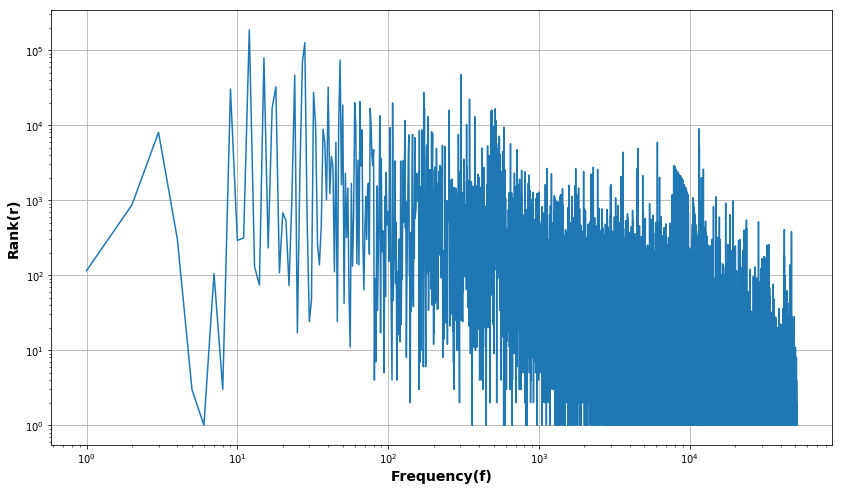

In [120]:
plt.figure(figsize=(14,8))
plt.loglog(ranks, freqs)

plt.xlabel('Frequency(f)',fontweight='bold',fontsize=14)
plt.ylabel('Rank(r)',fontweight='bold',fontsize=14)
plt.grid(True)
plt.show()


## Repeating Words

In [169]:
repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
repl = r'\1\2\3'

def repeat(word):
    
    repl_word = repeat_regexp.sub(repl,word)
    return repeat(repl_word) if repl_word != word else repl_word

In [171]:
repeat('i love you a lottt')

'i love you my bok a lot'